# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - myeloids - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240503

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import numpy as np
            #import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats
import muon as mu
from muon import atac as ac
from muon import prot

In [2]:
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [3]:
input = '/home/acirnu/data/ACM_cardiac_leuco/5_Leiden_clustering_and_annotation/ACM_myeloids_clustered_muon_ac240502.raw.h5mu'
mdata_data = mu.read_h5mu(input)
mdata_data

MuData object with n_obs × n_vars = 34482 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	34482 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    prot:	34482 x 99
      obs:	'library', 'batch'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [4]:
adata = mdata_data.mod["rna"]
adata

AnnData object with n_obs × n_vars = 34482 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    uns: 'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs

,cell_source,donor,n_counts,sample,seed_labels,condition,genotype,infection,library,model,...,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,batch,C_scANVI,leiden,classification
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,DOCK4+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.000000,0.0,-0.019995,-0.083225,6,1,reference,DOCK4+MØ,3,DOCK4+MØ_3
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.025940,0.0,-0.169221,-0.390143,6,4,reference,Monocytes,3,DOCK4+MØ_3
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.051323,0.0,-0.317631,-0.578955,7,4,reference,Monocytes,6,Monocytes_6
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.014110,0.0,-0.370103,-0.370084,7,2,reference,LYVE1+MØ,2,LYVE1+MØ_2
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.040006,0.0,-0.142503,-0.357287,7,2,reference,LYVE1+MØ,2,LYVE1+MØ_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGTTAGTA-1-B2,AG_Gerull,Ttn_HetKO_MCMV_1,4226.0,Ttn_HetKO_MCMV_1,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,0.141978,0.0,-0.373712,-0.402608,25,7,query,Neutrophils,5,Neutrophils_5
TTTGTTGCAAGCTCTA-1-B2,AG_Gerull,Ttn_Ctr_noninf_1,3733.0,Ttn_Ctr_noninf_1,Unknown,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,Ttn,...,0.000000,0.0,-0.179842,-0.495021,23,7,query,DOCK4+MØ,9,DOCK4+MØ_9
TTTGTTGGTACAGGTG-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,24293.0,Ttn_Ctr_MCMV_2,Unknown,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,...,0.000000,13.0,-0.435458,-0.744327,21,7,query,MØ_general,10,MØ_general_10
TTTGTTGTCCCAGGAC-1-B2,AG_Gerull,Ttn_Ctr_noninf_2,6388.0,Ttn_Ctr_noninf_2,Unknown,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,Ttn,...,0.140889,0.0,0.080642,-0.877899,24,7,query,MØ_general,0,MØ_general_0


In [6]:
new_order_genotype = ['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO']
adata.obs["genotype"] = adata.obs["genotype"].cat.reorder_categories(new_order_genotype, ordered=True)

adata.obs["genotype"].cat.categories

Index(['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO'], dtype='object')

In [7]:
new_order_infection = ['noninf', 'MCMV']
adata.obs["infection"] = adata.obs["infection"].cat.reorder_categories(new_order_infection, ordered=True)

adata.obs["infection"].cat.categories

Index(['noninf', 'MCMV'], dtype='object')

In [8]:
new_order_condition = ['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV', 'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf','Ttn_Ctr_MCMV', 'Ttn_HetKO_MCMV' ]
adata.obs["condition"] = adata.obs["condition"].cat.reorder_categories(new_order_condition, ordered=True)

adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV',
       'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf', 'Ttn_Ctr_MCMV',
       'Ttn_HetKO_MCMV'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [9]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="classification",
    sample_identifier="sample",
    covariate_obs=["genotype", "infection", "condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 34512 × 29396
  2 modalities
    rna:	34482 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    coda:	30 x 18
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'

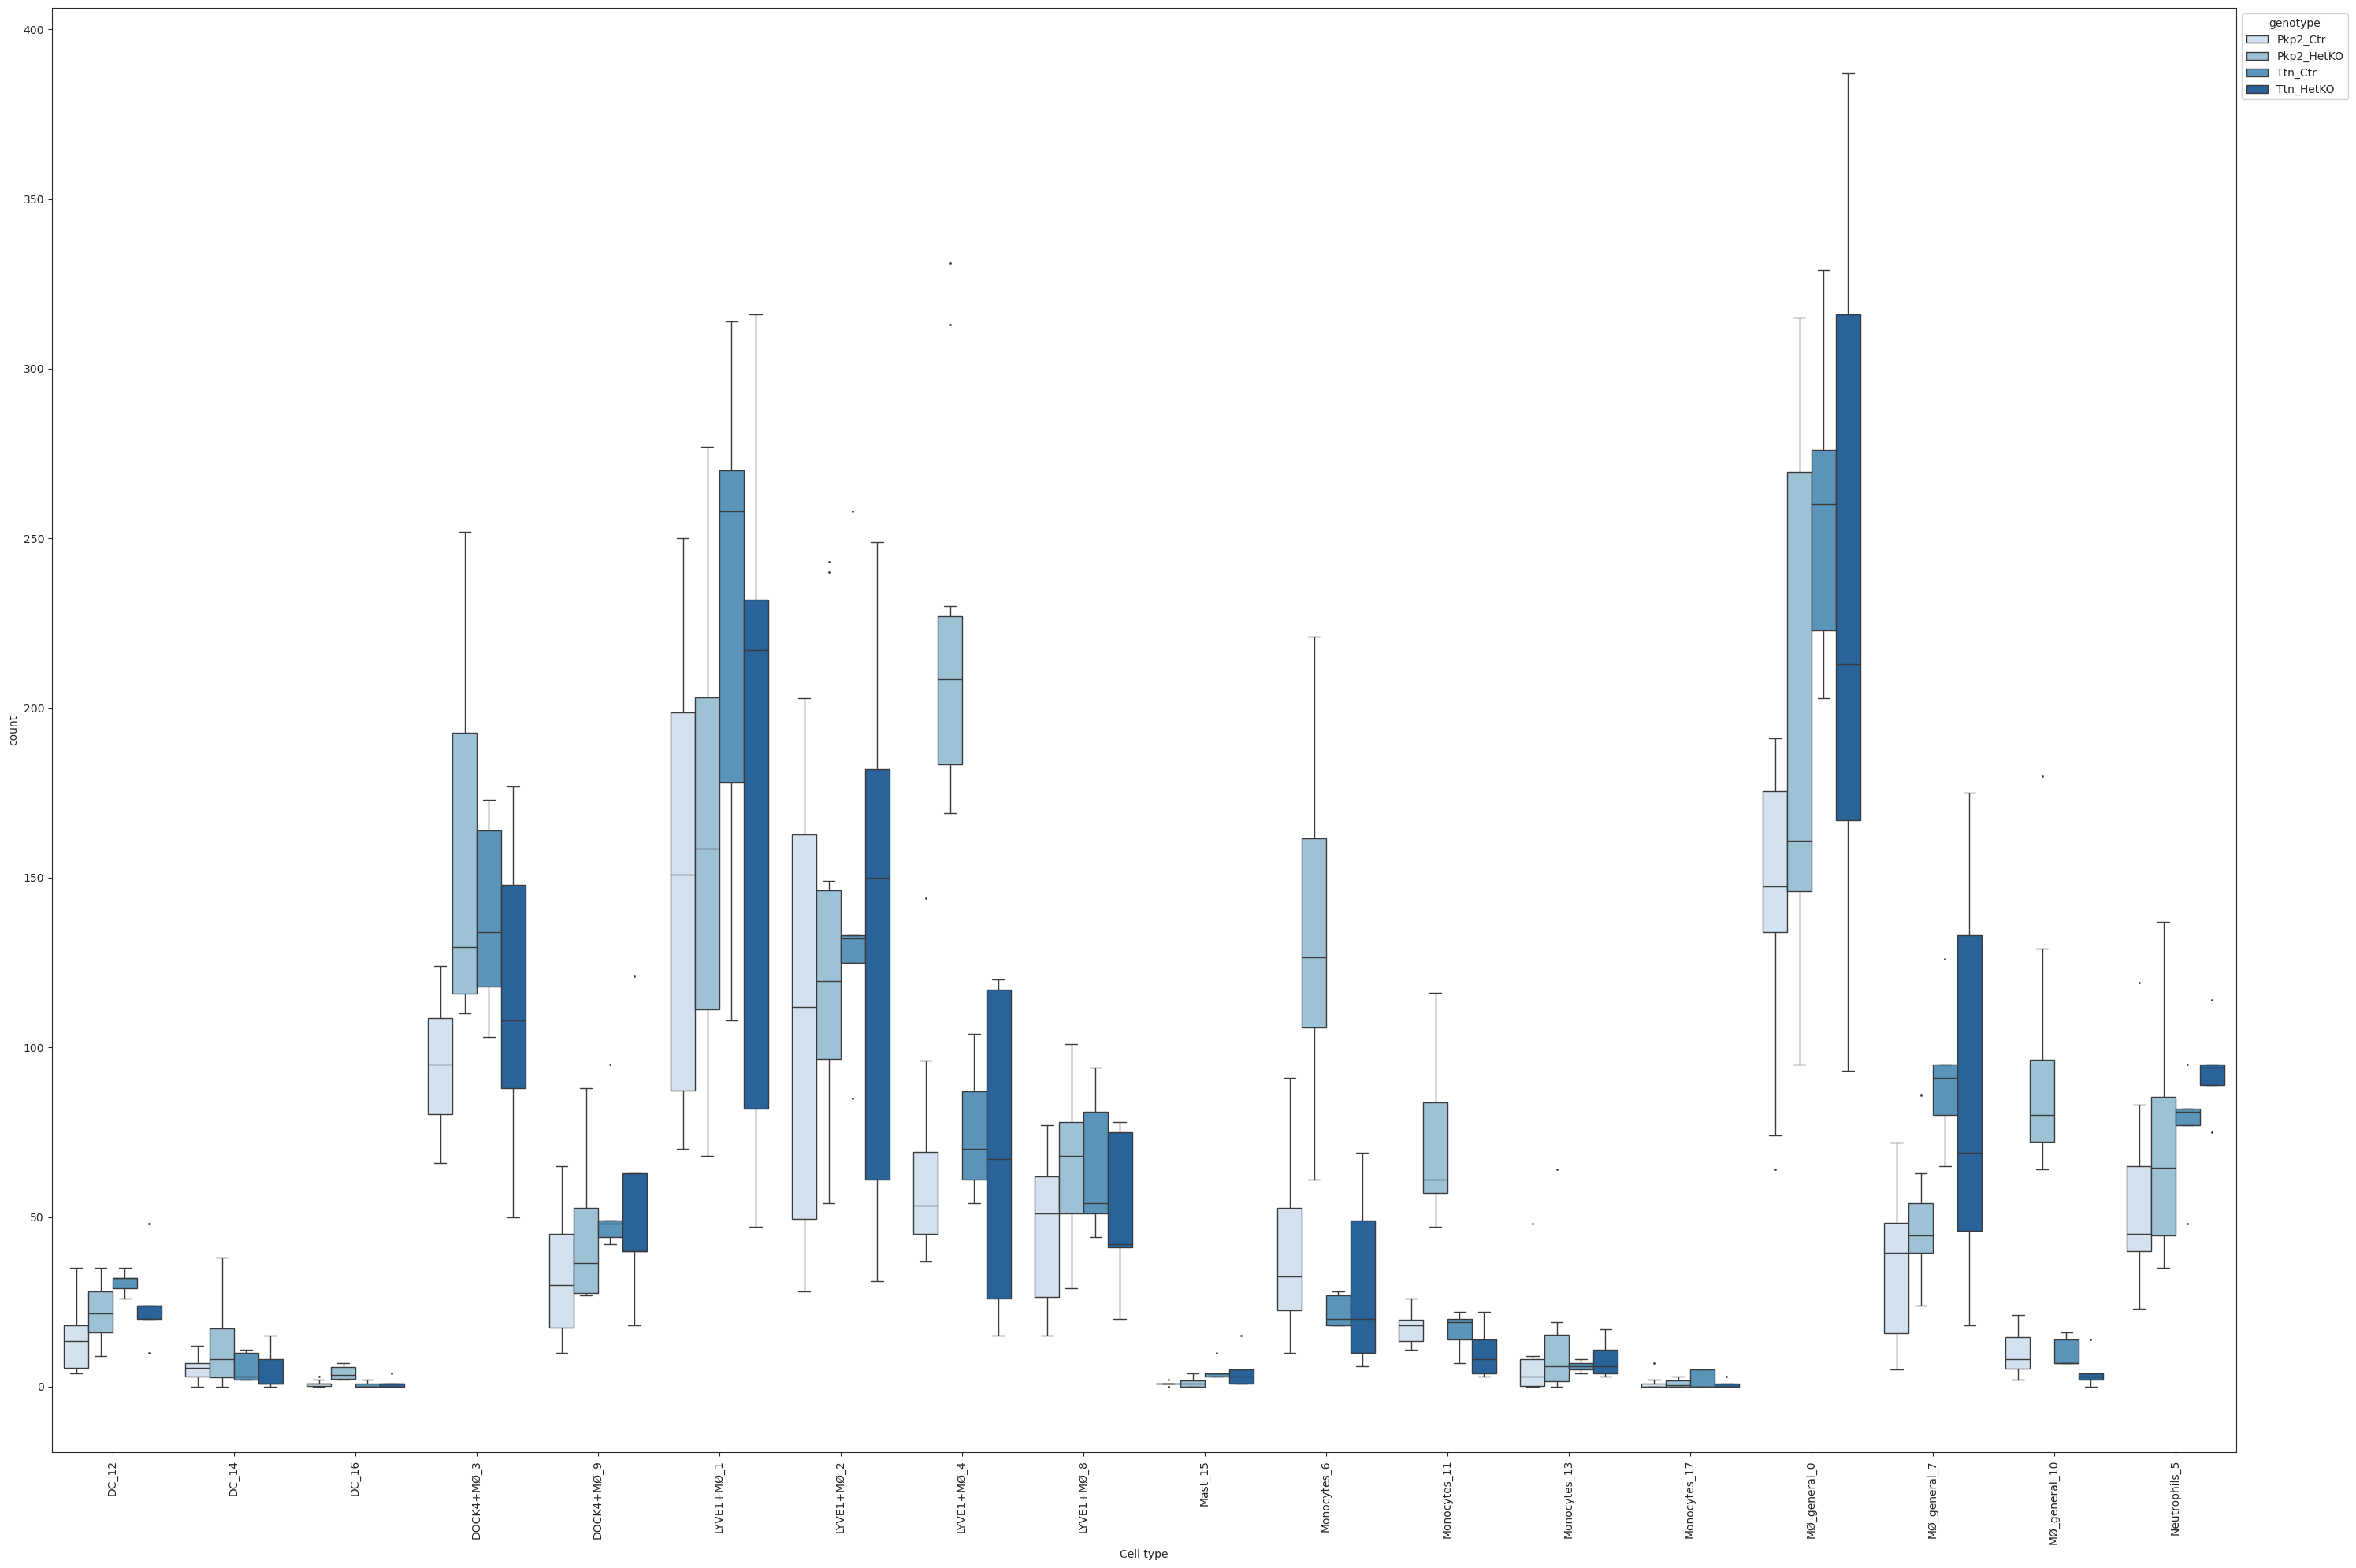

In [10]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="genotype",
    y_scale="count",
    figsize=(30, 20),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

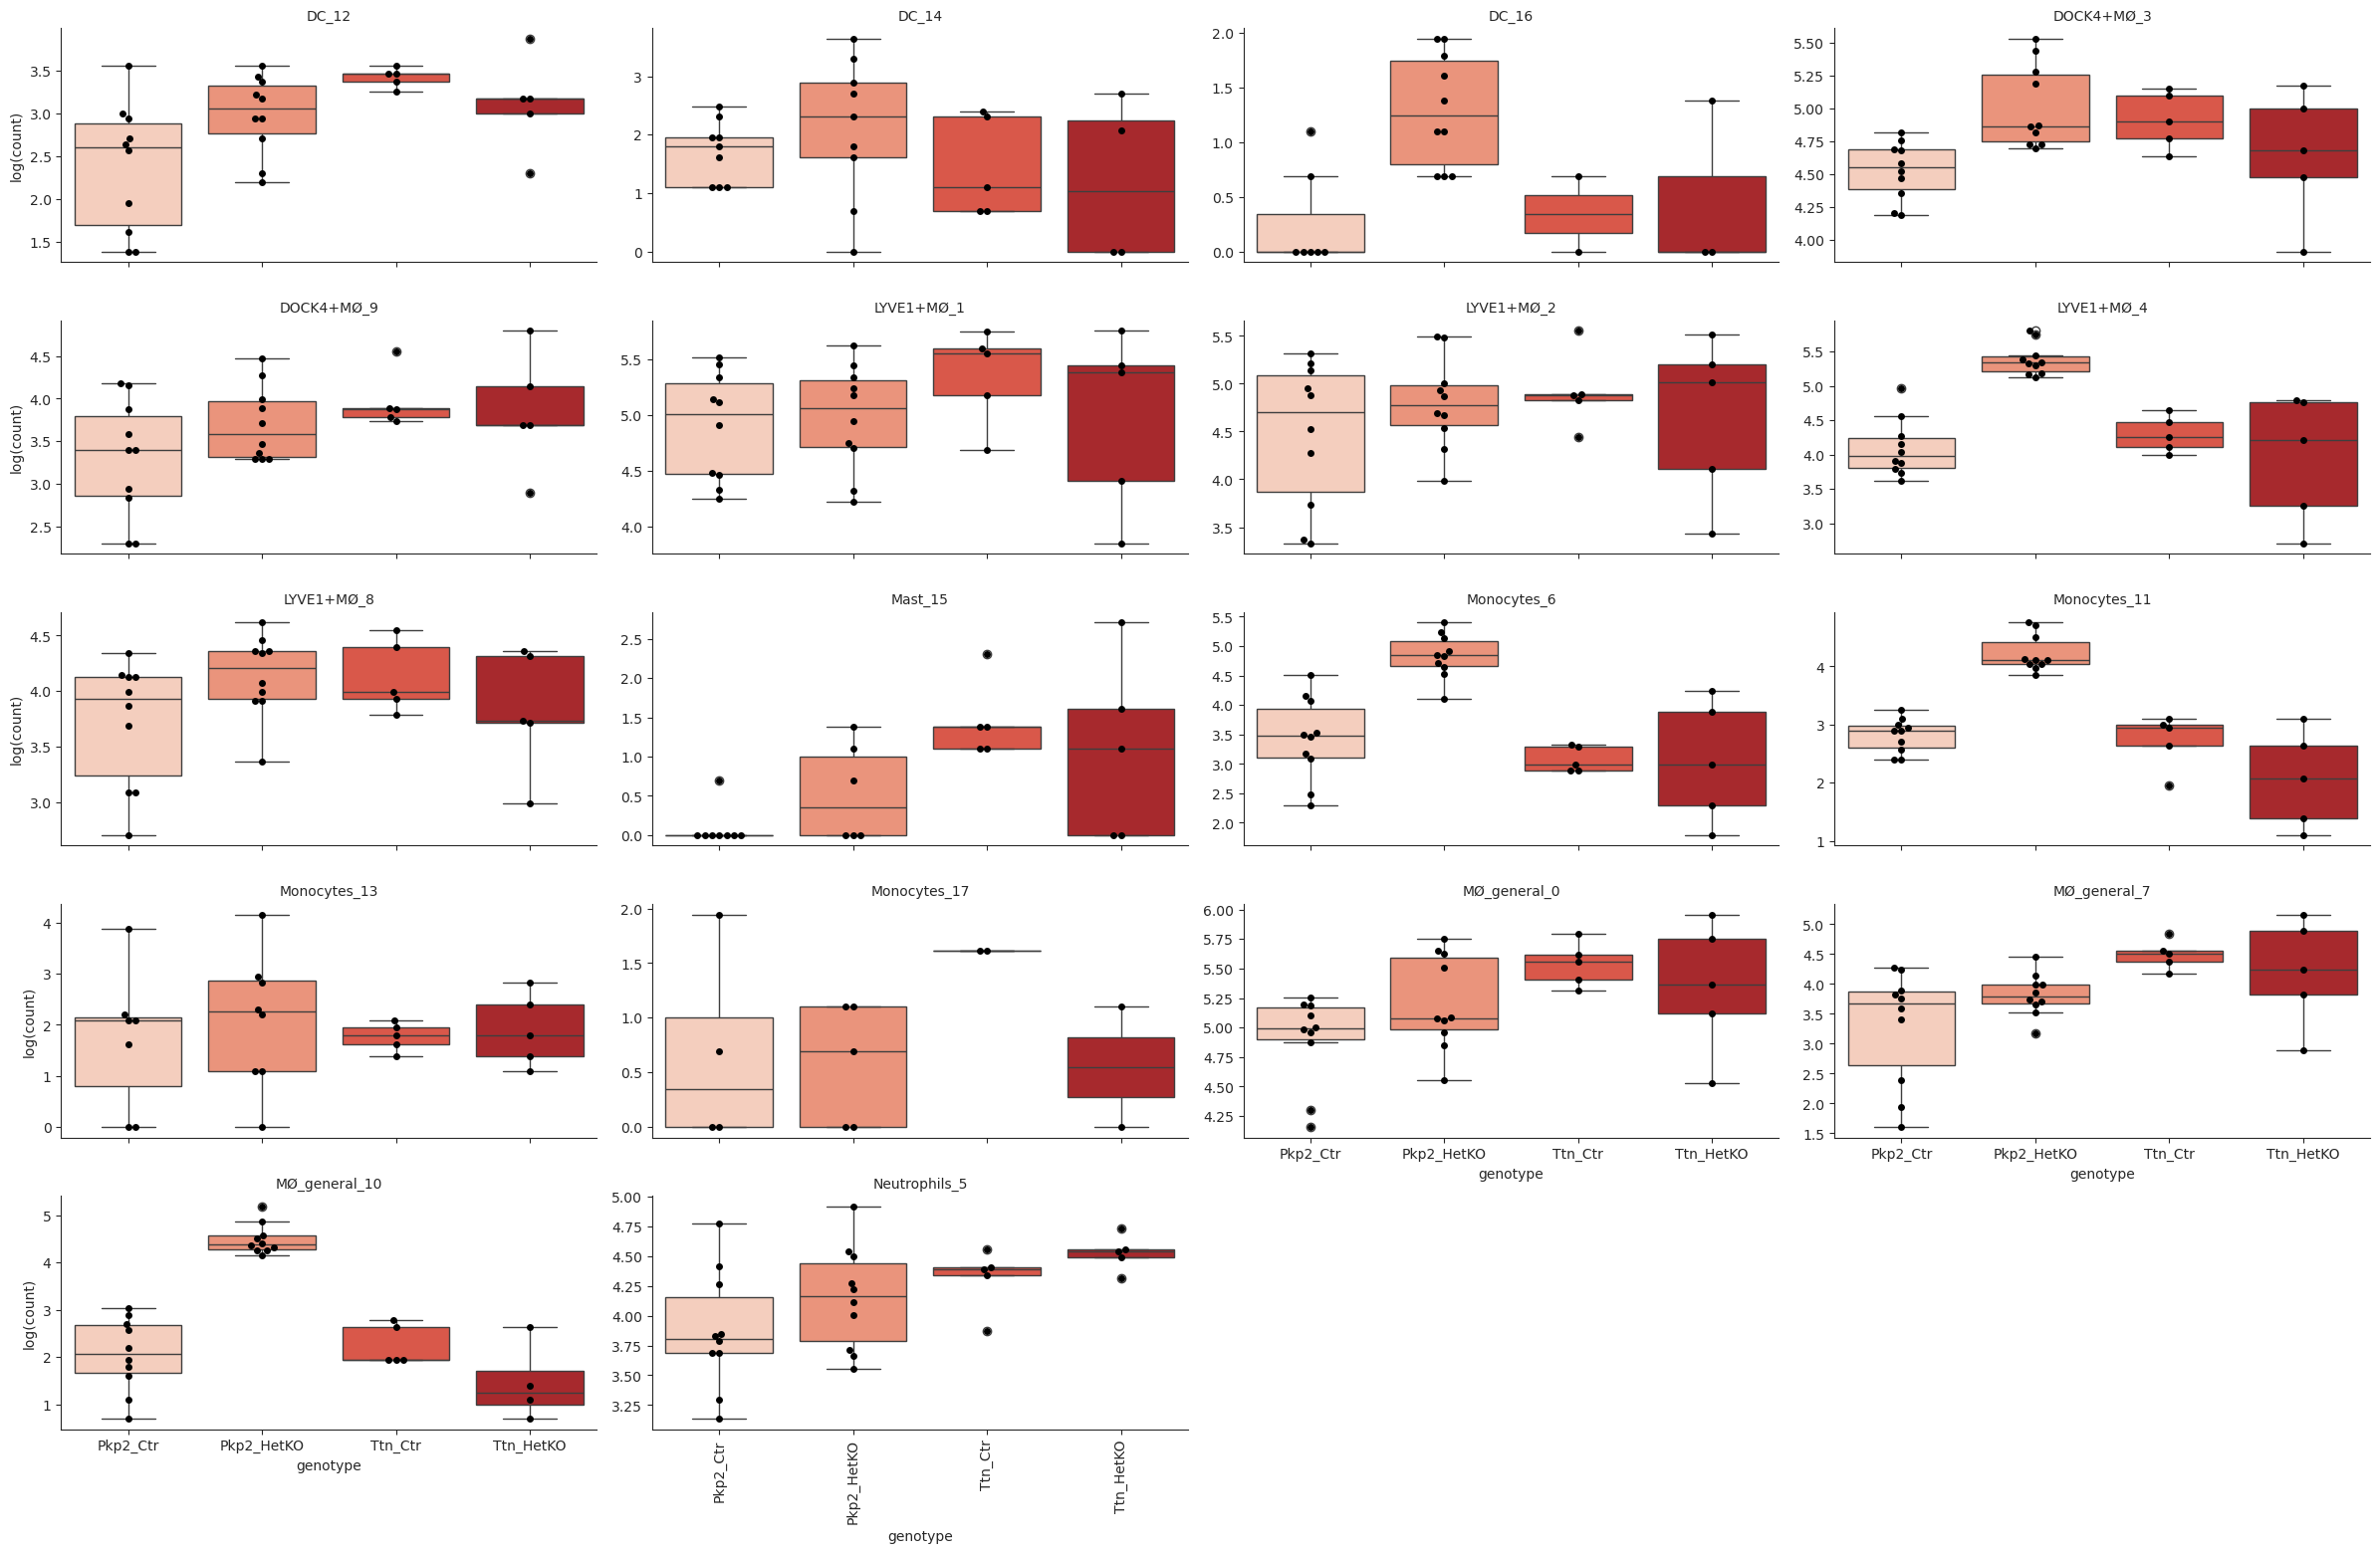

In [11]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="genotype",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.xticks(rotation=90)
plt.show()

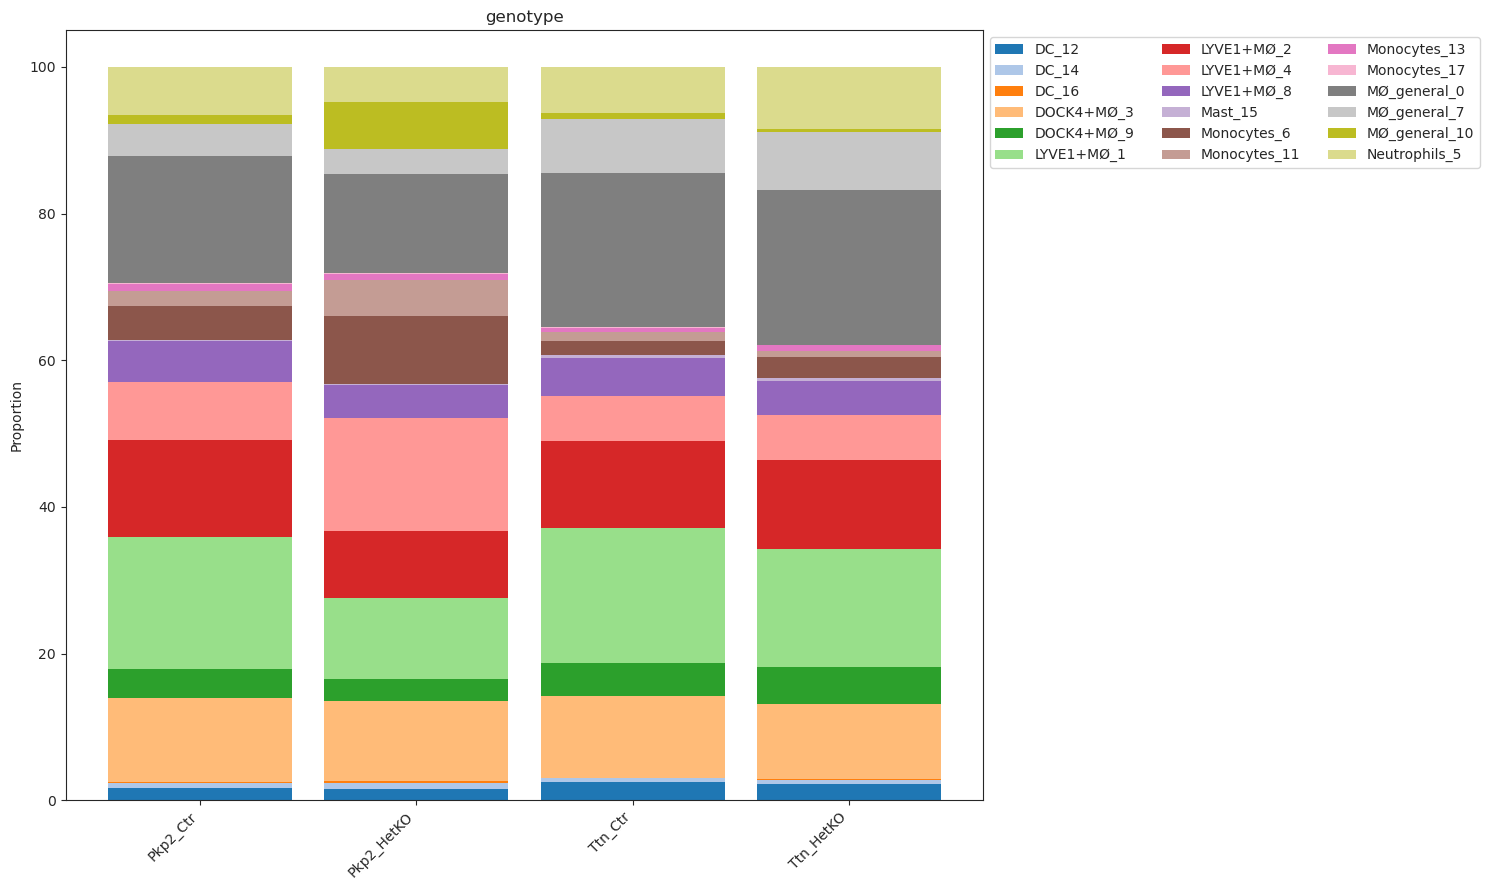

In [12]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="genotype", figsize=(15, 9) 
)
plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [13]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="genotype",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

Automatic reference selection! Reference cell type set to DC_12

Zero counts encountered in data! Added a pseudocount of 0.5.

AnnData object with n_obs × n_vars = 30 × 18
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

Run No-U-turn HMC sampling (nuts)

In [14]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


sample: 100%|██████████| 11000/11000 [05:42<00:00, 32.10it/s, 511 steps of size 9.21e-03. acc. prob=0.87] 


In [15]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 30 × 18
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_genotype[T.Pkp2_HetKO]', 'effect_df_genotype[T.Ttn_Ctr]', 'effect_df_genotype[T.Ttn_HetKO]'

#### Result interpreteation

**Intercepts**

The first column of the intercept summary shows the parameters determined by the MCMC inference.

The “Expected sample” column gives some context to the numerical values. If we had a new sample (with no active covariates) with a total number of cells equal to the mean sampling depth of the dataset, then this distribution over the cell types would be most likely.

**Effects**

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

Since the numerical values of the “Final Parameter” column are not straightforward to interpret, the “Expected sample” and “log2-fold change” columns give us an idea on the magnitude of the change. The expected sample is calculated for each covariate separately (covariate value = 1, all other covariates = 0), with the same method as for the intercepts. The log-fold change is then calculated between this expected sample and the expected sample with no active covariates from the intercept section. Since the data is compositional, cell types for which no credible change was detected, can still change in abundance as well, as soon as a credible effect is detected on another cell type due to the sum-to-one constraint. If there are no credible effects for a covariate, its expected sample will be identical to the intercept sample, therefore the log2-fold change is 0.

In [16]:
sccoda_model.summary(sccoda_data, modality_key= "coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 30 samples, 18 cell types                                    │
│ Reference cell type                        │ DC_12                                                              │
│ Formula                                    │ genotype                                                           │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                Final Parameter  Expected Sample                                                                 │
│ Cell Type                                                                                                       │
│ DC_12               1.271           25.257                                                                      │
│ DC_14               0.225            8.874                                                                      │
│ DC_16              -0.554            4.072                                                                      │
│ DOCK4+MØ_3          3.003          142.754                                                                      │
│ DOCK4+MØ_9          1.928           48.722                                                                      │
│ LYVE1+MØ_1          3.329          197.773                                                                      │
│ LYVE1+MØ_2          2.966          137.569                                                                      │
│ LYVE1+MØ_4          2.485           85.040                                                                      │
│ LYVE1+MØ_8          2.234           66.163                                                                      │
│ Mast_15            -0.441            4.559                                                                      │
│ Monocytes_6         1.783           42.145                                                                      │
│ Monocytes_11        1.175           22.946                                                                      │
│ Monocytes_13        0.217            8.803                                                                      │
│ Monocytes_17       -0.687            3.565                                                                      │
│ MØ_general_0        3.383          208.747                                                                      │
│ MØ_general_7        2.025           53.684                                                                      │
│ MØ_general_10       0.623           13.212                                                                      │
│ Neutrophils_5       2.375           76.182                                                                      │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                     Final Parameter  Expected Sample  log2-fold change                          │
│ Covariate            Cell Type                                                                                  │
│ genotypeT.Pkp2_HetKO DC_12              0.000            18.934            -0.416                               │
│                      DC_14              0.000             6.652            -0.416                               │
│                      DC_16              0.000             3.052            -0.416                               │
│                      DOCK4+MØ_3         0.000           107.013            -0.416                               │
│                      DOCK4+MØ_9         0.000            36.523            -0.416                               │
│                      LYVE1+MØ_1         0.000           148.258            -0.416                               │
│                      LYVE1+MØ_2         0.000           103.126            -0.416                               │
│                      LYVE1+MØ_4         1.021           177.019             1.058                               │
│                      LYVE1+MØ_8         0.000            49.598            -0.416                               │
│                      Mast_15            0.000             3.418            -0.416                               │
│                      Monocytes_6        1.187           103.488             1.296                               │
│                      Monocytes_11       1.190            56.560             1.302                               │
│                      Monocytes_13       0.000             6.599            -0.416                               │
│                      Monocytes_17       0.000             2.672            -0.416                               │
│                      MØ_general_0       0.000           156.484            -0.416                               │
│                      MØ_general_7       0.000            40.244            -0.416                               │
│                      MØ_general_10      2.002            73.315             2.472                               │
│                      Neutrophils_5      0.000            57.109            -0.416                               │
│ genotypeT.Ttn_Ctr    DC_12              0.000            24.631            -0.036                               │
│                      DC_14              0.000             8.654            -0.036                               │
│                      DC_16              0.000             3.971            -0.036                               │
│                      DOCK4+MØ_3         0.000           139.215            -0.036                               │
│                      DOCK4+MØ_9         0.000            47.514            -0.036                               │
│                      LYVE1+MØ_1         0.000           192.870            -0.036                               │
│                      LYVE1+MØ_2         0.000           134.158            -0.036                               │
│                      LYVE1+MØ_4         0.000            82.932            -0.036                               │
│                      LYVE1+MØ_8         0.000            64.523            -0.036                               │
│                      Mast_15            0.000             4.446            -0.036                               │
│                      Monocytes_6        0.000            41.100            -0.036                               │
│                      Monocytes_11       0.000         

### Filter out credible effects

In [17]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate               Cell Type    
genotype[T.Pkp2_HetKO]  DC_12            False
                        DC_14            False
                        DC_16            False
                        DOCK4+MØ_3       False
                        DOCK4+MØ_9       False
                        LYVE1+MØ_1       False
                        LYVE1+MØ_2       False
                        LYVE1+MØ_4        True
                        LYVE1+MØ_8       False
                        Mast_15          False
                        Monocytes_6       True
                        Monocytes_11      True
                        Monocytes_13     False
                        Monocytes_17     False
                        MØ_general_0     False
                        MØ_general_7     False
                        MØ_general_10     True
                        Neutrophils_5    False
genotype[T.Ttn_Ctr]     DC_12            False
                        DC_14            False
                      

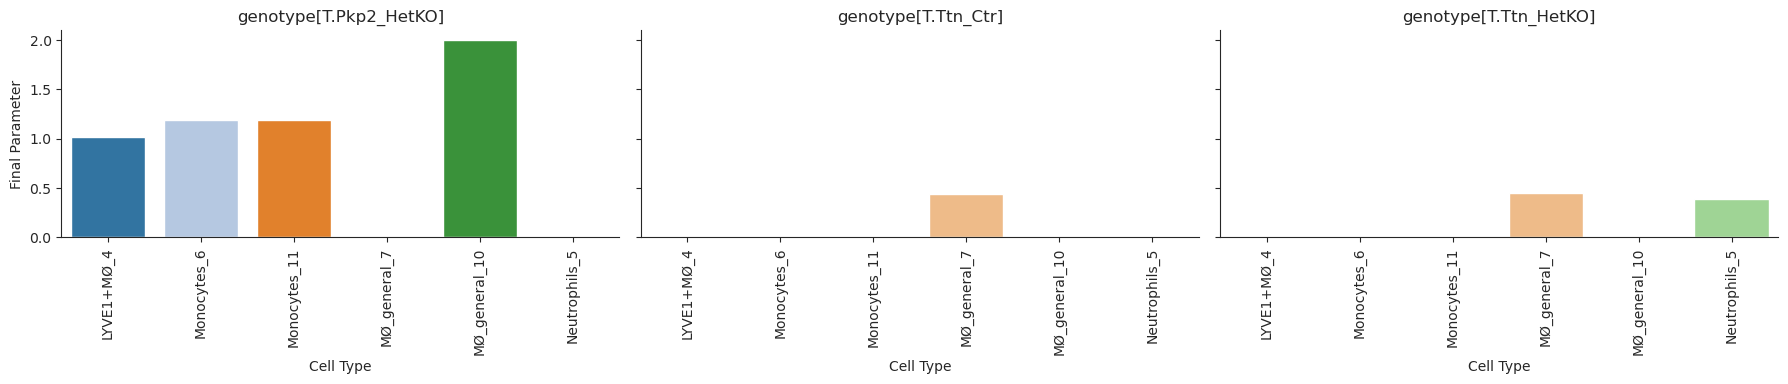

In [18]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key="coda", parameter="Final Parameter")

##### Adjust the "false discovery rate"

In [19]:
sccoda_data

MuData object with n_obs × n_vars = 34512 × 29396
  2 modalities
    rna:	34482 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    coda:	30 x 18
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.Pkp2_HetKO]', 'effect_df_genotype[T.Ttn_Ctr]', 'effect_df_genotype[T.Ttn_HetKO]'

In [20]:
sccoda_data["coda"].varm["effect_df_genotype[T.Pkp2_HetKO]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
DC_12,0.000000,0.000,0.000,0.000,0.0000,18.933910,-0.415738
DC_14,0.000000,-0.347,0.783,0.201,0.3475,6.652246,-0.415738
DC_16,0.000000,-0.113,1.204,0.380,0.5722,3.052480,-0.415738
DOCK4+MØ_3,0.000000,-0.004,0.385,0.127,0.4845,107.013448,-0.415738
DOCK4+MØ_9,0.000000,-0.347,0.228,0.074,0.2187,36.523450,-0.415738
LYVE1+MØ_1,0.000000,-0.419,0.001,0.147,0.7088,148.258076,-0.415738
LYVE1+MØ_2,0.000000,-0.229,0.189,0.048,0.1863,103.126306,-0.415738
LYVE1+MØ_4,1.021305,0.774,1.271,0.123,1.0000,177.019467,1.057694
LYVE1+MØ_8,0.000000,-0.138,0.372,0.076,0.2353,49.598198,-0.415738


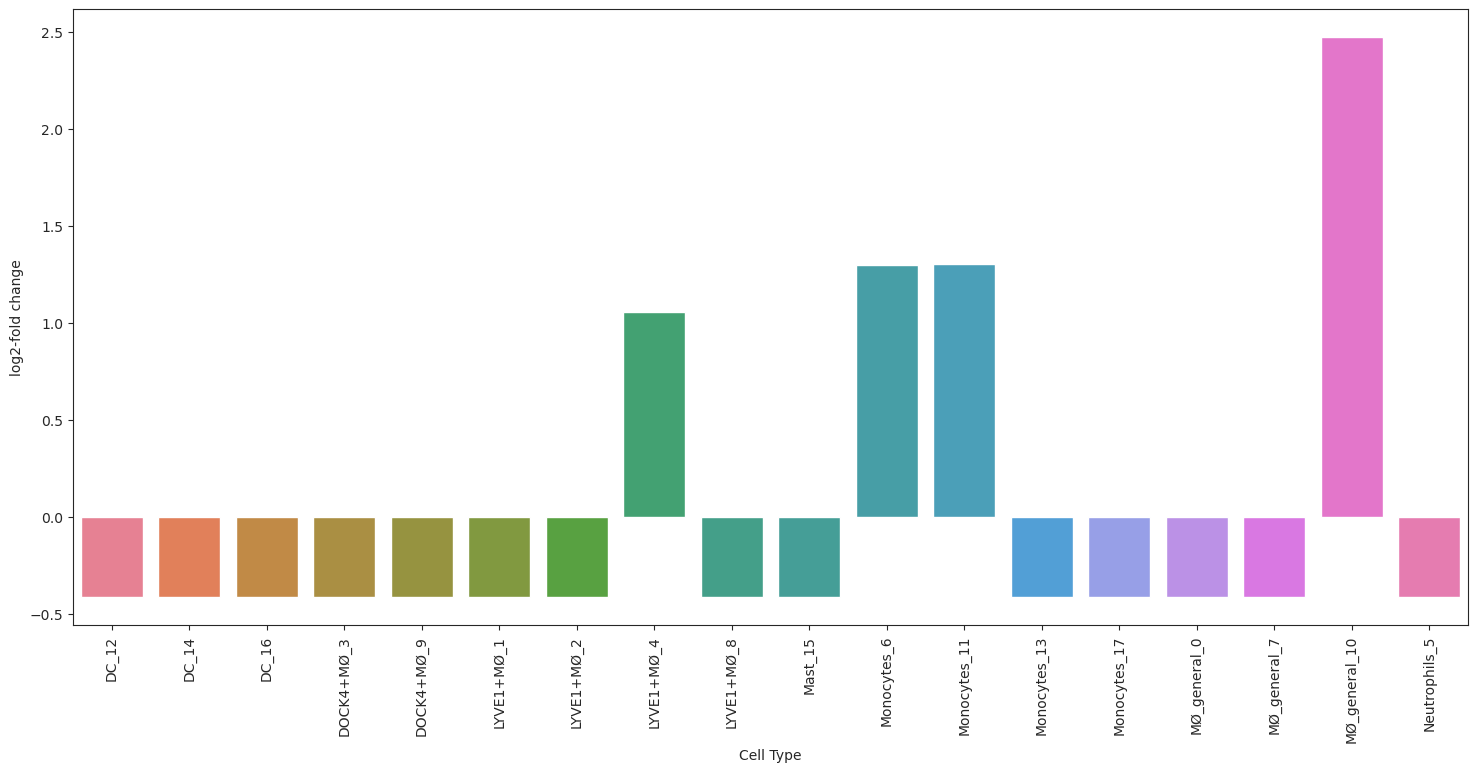

In [21]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_genotype[T.Pkp2_HetKO]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.show()

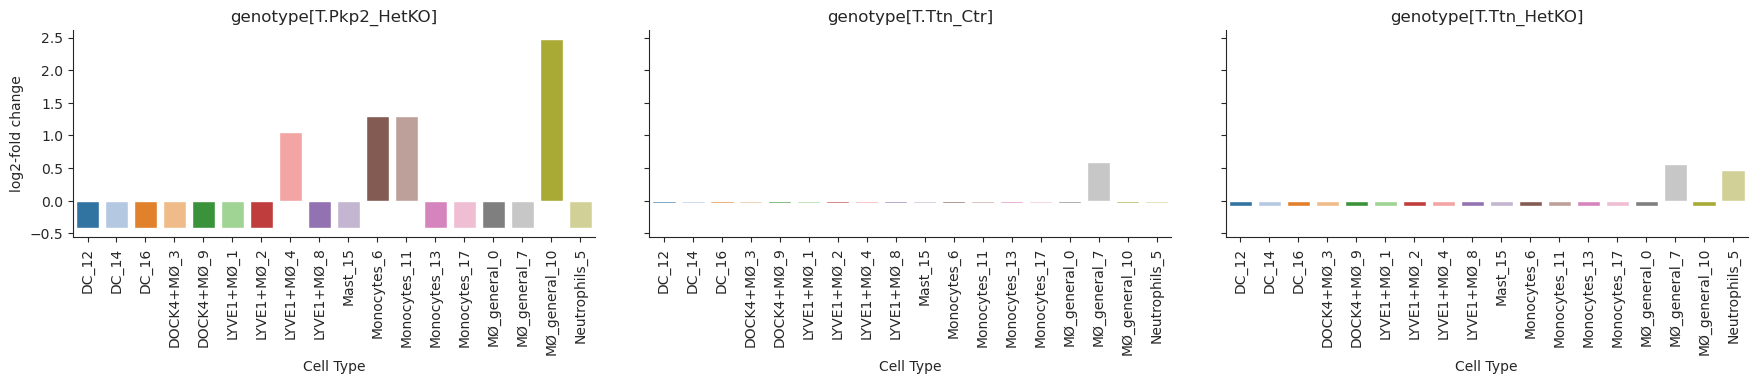

In [22]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "genotype")
plt.show()